<ipython-input-8-f3f06f3065b0>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Passengers_shifted'] = df['Passengers'].shift(1).fillna(method='bfill')


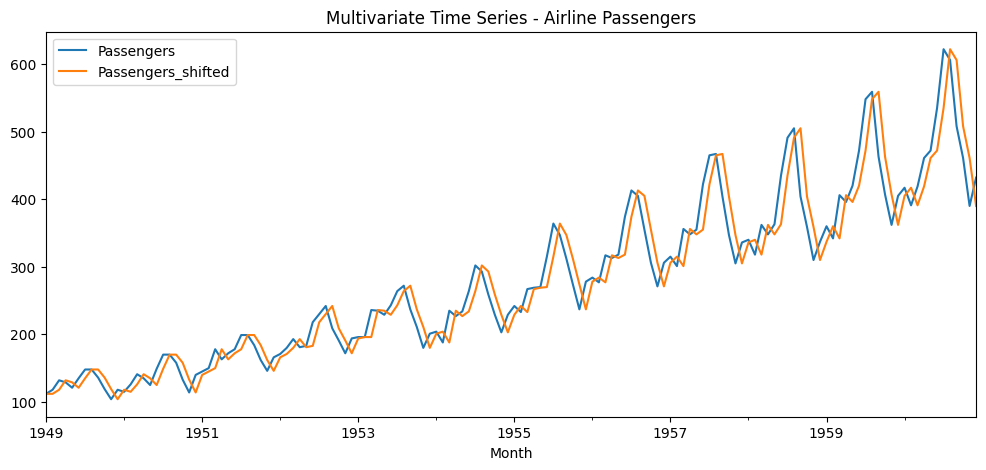

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


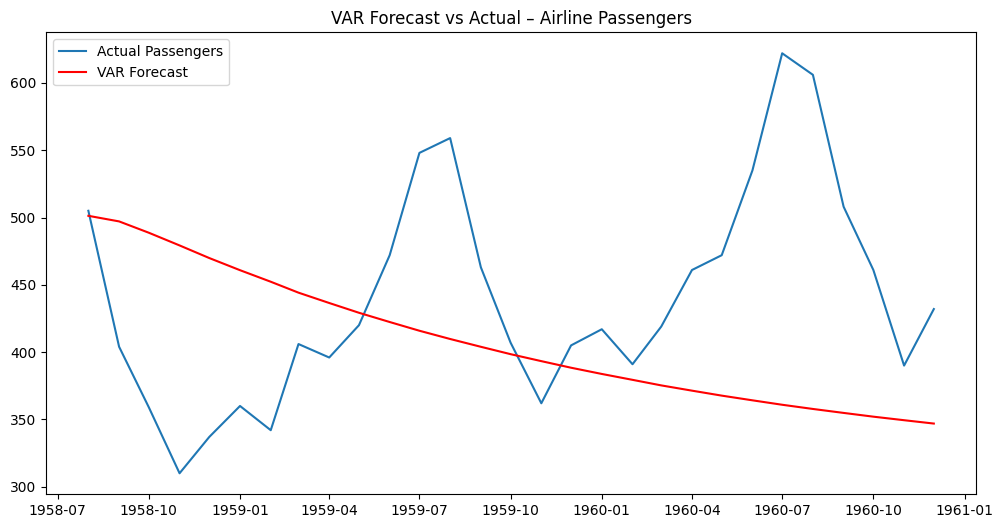

RMSE (Passengers Forecast): 112.89


In [8]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
from math import sqrt

# Step 2: Load the dataset
df = pd.read_csv('/content/ch3_airline_passengers.csv')
df.columns = ['Month', 'Passengers']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Step 3: Create synthetic second variable (e.g., rolling mean or shifted)
df['Passengers_shifted'] = df['Passengers'].shift(1).fillna(method='bfill')

# Step 4: Plot the variables
df[['Passengers', 'Passengers_shifted']].plot(figsize=(12, 5), title='Multivariate Time Series - Airline Passengers')
plt.show()

# Step 5: Split into train and test sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Step 6: Fit VAR model
model = VAR(train)
fitted_model = model.fit(maxlags=15, ic='aic')  # auto-select best lag using AIC

# Step 7: Forecast
forecast_input = train.values[-fitted_model.k_ar:]
forecast_steps = len(test)
forecast = fitted_model.forecast(y=forecast_input, steps=forecast_steps)

# Step 8: Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=['Passengers_forecast', 'Passengers_shifted_forecast'])

# Step 9: Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(test['Passengers'], label='Actual Passengers')
plt.plot(forecast_df['Passengers_forecast'], label='VAR Forecast', color='red')
plt.title('VAR Forecast vs Actual – Airline Passengers')
plt.legend()
plt.show()

# Step 10: Evaluate
rmse = sqrt(mean_squared_error(test['Passengers'], forecast_df['Passengers_forecast']))
print(f'RMSE (Passengers Forecast): {rmse:.2f}')
